In [69]:
import pandas as pd
from datetime import datetime

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
import make_report_evolutions as mre
import numpy as np

In [70]:
#loading file
df = pd.read_csv('../list_investments/my_list_of_investments.csv', skipinitialspace=True)

#Removing missing time values
df['start_date'] = df['start_date'].fillna(datetime.now())
df['end_date'] = df['end_date'].fillna(datetime.now())

#Fixing data types
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

#Time differences
df['delta_t'] = (df['end_date'] - df['start_date'])#.astype('timedelta64[s]')

In [3]:
df.head()

,coin,amount,type,start_date,end_date,start_value_usd,end_value_usd,start_value_btc,end_value_btc,delta_t
0,BTG,12.0000,bitcoin,2019-04-27 12:00:00,2020-01-26 13:05:28.638644,887.20,NaN,0.1000,NaN,274 days 01:05:28.638644
1,BTC,0.0571,usd,2019-07-11 13:00:00,2019-08-06 00:00:00.000000,653.30,694.03,0.0571,0.0571,25 days 11:00:00
2,BNB,52.0000,bitcoin,2019-04-22 09:39:00,2020-01-26 13:05:28.638644,1251.00,NaN,0.2359,NaN,279 days 03:26:28.638644
3,BTC,0.0308,usd,2019-08-10 18:22:00,2020-01-26 13:05:28.638644,350.00,NaN,0.0308,NaN,168 days 18:43:28.638644
4,LTC,3.7900,usd,2019-08-11 23:00:00,2020-01-26 13:05:28.638644,343.63,NaN,0.0301,NaN,167 days 14:05:28.638644


In [4]:
df.dtypes

coin                        object
amount                     float64
type                        object
start_date          datetime64[ns]
end_date            datetime64[ns]
start_value_usd            float64
end_value_usd              float64
start_value_btc            float64
end_value_btc              float64
delta_t            timedelta64[ns]
dtype: object

In [17]:
seconds_in_the_past = (datetime.now() - df['start_date'].min() ).total_seconds()
data  = mre.read_crypto_data('BTC', seconds_in_the_past)[['time_re', 'price_usd', 'price_btc']]
data.tail()

,time_re,price_usd,price_btc
26518,1580050057,8456.69,1.0
26519,1580050358,8459.72,1.0
26520,1580050659,8453.75,1.0
26521,1580050961,8445.24,1.0
26522,1580051262,8447.60,1.0


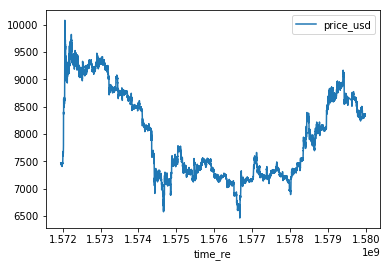

In [17]:
data.plot(x='time_re', y='price_usd')

In [5]:
def load_usd_btc_prices_for_one_investment(coin, date_start, date_end):
    
    seconds_in_the_past = (datetime.now() - date_start ).total_seconds()

    df_temp  = mre.read_crypto_data(coin, seconds_in_the_past)[['time_re', 'price_usd', 'price_btc']]
    
    return df_temp[df_temp['time_re'] <= date_end.timestamp()]

In [8]:
print(df['coin'].iloc[0])

#load_usd_btc_prices_for_one_investment(df['coin'].iloc[0], df['start_date'].iloc[0], df['end_date'].iloc[0])

BTG     


In [6]:
def load_one_investment(df_investments):
    
    coin = df_investments['coin']
    start_date = df_investments['start_date']
    end_date = df_investments['end_date']
    amount = df_investments['amount']
    
    df_temp = load_usd_btc_prices_for_one_investment(coin, start_date, end_date)
    
    df_temp.columns = ['time_re', 'value_usd', 'value_btc']
    
    df_temp['value_usd'] = df_temp['value_usd'].apply(lambda x: x*amount)
    df_temp['value_btc'] = df_temp['value_btc'].apply(lambda x: x*amount)
    
    return df_temp

Coin:  BTG     
Investment type:  bitcoin   
Amount:  12.0
Status: ACTIVE
Initial date:  2019-04-27 12:00:00
End date    :  running now!
Duration: 274 days
Initial value (usd):  887.2
Final value   (usd):  135.6
Delta usd: -84.72 %
Initial value (btc):  0.1
Final value   (btc):  0.0160464067764
Delta btc: -83.95 %
 
Coin:  BTC     
Investment type:  usd       
Amount:  0.0571
Status: ENDED
Initial date:  2019-07-11 13:00:00
End date    :  2019-08-06 00:00:00
Duration: 25 days
Initial value (usd):  653.3
Final value   (usd):  694.03
Delta usd: 6.23 %
Initial value (btc):  0.0571
Final value   (btc):  0.0571
Delta btc: 0.00 %
 
Coin:  BNB     
Investment type:  bitcoin   
Amount:  52.0
Status: ACTIVE
Initial date:  2019-04-22 09:39:00
End date    :  running now!
Duration: 279 days
Initial value (usd):  1251.0
Final value   (usd):  895.44
Delta usd: -28.42 %
Initial value (btc):  0.2359
Final value   (btc):  0.105963086164
Delta btc: -55.08 %
 
Coin:  BTC     
Investment type:  usd       

,time_re,BTG0,BTC1,BNB2,BTC3,LTC4,total
26511,1580047563,141.72,0.0,893.36,259.960316,206.3655,1501.405816
26512,1580048248,139.80,0.0,891.80,259.719768,206.1002,1497.419968
26513,1580048550,139.68,0.0,891.80,259.689276,206.1002,1497.269476
26514,1580048852,141.12,0.0,892.32,259.750876,206.1002,1499.291076
26515,1580049153,140.40,0.0,893.88,260.182076,206.4792,1500.941276
26516,1580049454,139.56,0.0,893.88,260.431556,206.8203,1500.691856
26517,1580049756,139.44,0.0,894.40,260.491616,207.4267,1501.758316
26518,1580050057,138.96,0.0,894.40,260.466052,207.3888,1501.214852
26519,1580050358,137.52,0.0,894.40,260.559376,207.3888,1499.868176
26520,1580050659,136.80,0.0,894.40,260.375500,207.3888,1498.964300


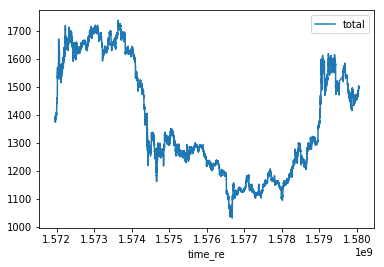

In [75]:
seconds_in_the_past = (datetime.now() - df['start_date'].min() ).total_seconds()

totals_btc  = mre.read_crypto_data('BTC', seconds_in_the_past)[['time_re']]
totals_usd  = mre.read_crypto_data('BTC', seconds_in_the_past)[['time_re']]


active_investments = []
actual_value_usd = []
actual_value_btc = []
change_usd = []
change_btc = []

for index, row in df.iterrows():
    
    is_active = True if np.isnan(row['end_value_usd']) else False
    active_investments.append(is_active)
    
    df_temp = load_one_investment(row)
    
    print("Coin: ", row['coin'])
    print("Investment type: ", row['type'])
    print("Amount: ", row['amount'])
    
    if is_active:
        print("Status: ACTIVE")
        final_value_usd = df_temp['value_usd'].iloc[-1]
        final_value_btc = df_temp['value_btc'].iloc[-1]
        actual_value_usd.append(final_value_usd)
        actual_value_btc.append(final_value_btc)
    else:
        print("Status: ENDED")
        final_value_usd = row['end_value_usd']
        final_value_btc = row['end_value_btc']
        actual_value_usd.append(final_value_usd)
        actual_value_btc.append(final_value_btc)
    
    print("Initial date: ", row['start_date'])
    if is_active:
        print("End date    :  running now!")
    else:
        print("End date    : ", row['end_date'])
    print(f"Duration: {row['delta_t'].days} days")
    
    print("Initial value (usd): ", row['start_value_usd'])
    print("Final value   (usd): ", final_value_usd)
    change_usd_here = 100.0*(final_value_usd-row['start_value_usd'])/row['start_value_usd']
    print(f"Delta usd: {change_usd_here:.2f} %" )
    
    print("Initial value (btc): ", row['start_value_btc'])
    print("Final value   (btc): ", final_value_btc)
    change_btc_here = 100.0*(final_value_btc-row['start_value_btc'])/row['start_value_btc']
    print(f"Delta btc: {change_btc_here:.2f} %" )
    
    change_btc.append(change_btc_here)
    change_usd.append(change_usd_here)
    
    print(" ")
    #if df_temp.shape[0] == 0:
    #   continue

    #df_temp.plot('time_re', 'value_usd')
    #df_temp.plot('time_re', 'value_btc')
    
    totals_usd = totals_usd.merge(df_temp[['time_re', 'value_usd']], 
                                  left_on='time_re', right_on='time_re', how='left')
    totals_btc = totals_btc.merge(df_temp[['time_re', 'value_btc']], 
                                  left_on='time_re', right_on='time_re', how='left')
    
    colnames = [x.replace(' ','') for x in totals_btc.columns]
    colnames = colnames[:-1] + [row['coin'].replace(' ','')+f'{index}']
    totals_btc.columns = colnames
    totals_usd.columns = colnames
    

df['active'] = active_investments
df['actual_value_usd'] = actual_value_usd
df['actual_value_btc'] = actual_value_btc
df['change_usd'] = change_usd
df['change_btc'] = change_btc

df.head(10)

totals_usd = totals_usd.fillna(0.0)
totals_btc = totals_btc.fillna(0.0)

colnames = [x for x in totals_btc.columns][1:]

totals_usd['total'] = totals_usd[colnames].sum(axis=1)
totals_btc['total'] = totals_btc[colnames].sum(axis=1)

totals_usd.plot('time_re', 'total')
totals_usd.tail(30)
